In [1]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
Please enter the verification code: Access token retrieved correctly.


In [0]:
!mkdir -p drive
!google-drive-ocamlfuse drive -o nonempty

# **Features:**


*   Get overall stat of message count wrt contacts: **getOverallMessageStat()**
*   Get a bar plot of 'contacts vs #messages: **getMsgCountGraph()**
*   Get your message vocabulary stats: **getMyVocabularyStat()**
*   Get a bar plot of your message vocabulary: **getWordCountGraph()** 
*   Get wordcloud made out of your most used words: **show_wordcloud()**
*   Get number of messages exchanged w.r.t day of week: **getMessagebyWeekGraph()** 
*   Get number of messages exchanged w.r.t years: **getMessagebyYearGraph()**
*   Get number of messages exchanged w.r.t time of a day: **getMessagebyTimeGraph()**




In [0]:
from bs4 import BeautifulSoup
from collections import Counter
import os
import re
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [104]:
import nltk
nltk.download("punkt")

[nltk_data] Downloading package punkt to /content/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [105]:
!pip install wordcloud

In [0]:
from wordcloud import WordCloud, STOPWORDS

**Get total number of html files to parse:**

In [0]:
def getFileCount(dirname):
  path, dirs, files = os.walk(dirname).next()
  file_count = len(files)
  return file_count

**Name of Contact and number of messages exchanged:**

In [0]:
def getOverallMessageStat(dirname,time_step=50):
  num_files = getFileCount(dirname)
  msg_dct = {}
  for i in range(num_files):
    soup = BeautifulSoup(open(dirname+str(i)+'.html','r'), 'html.parser')
    ls = soup.find_all('p')
    num_msgs = len(ls)
    num_contact = soup.find('title').text[18:]
    msg_dct[num_contact] = num_msgs
    if i%time_step == 0:
      print "Progress:" + str(i) + " contacts processed"
  dct = sorted(msg_dct.items(), key=lambda x: x[1],reverse=True)
  return dct

  

In [4]:
msgstatList = getOverallMessageStat('drive/COLAB/Facebook/Message/')

Progress:0 contacts processed
Progress:50 contacts processed
Progress:100 contacts processed
Progress:150 contacts processed
Progress:200 contacts processed
Progress:250 contacts processed
Progress:300 contacts processed
Progress:350 contacts processed


In [0]:
def msgcountGraphHelper(msgstat,defaultcount = 10):
  nameList = []
  msgnumList = []
  count = 0
  for k in msgstat:
    if count <defaultcount:
      nameList.append(k[0])
      msgnumList.append(k[1])
    else:
      break
    count = count + 1
  return nameList, msgnumList

In [0]:
x, y = msgcountGraphHelper(msgstatList,15)

**Show bar plot of Contacts vs #Messages:**

In [0]:
def getMsgCountGraph(msgstatList,msgscount=10):
  x,y = msgcountGraphHelper(msgstatList,msgscount)
  n = len(x)
  sns.set_context(rc={"figure.figsize": (18, 5)})
  nd = np.arange(n)
  width=0.2
  plt.xticks(nd+width/2., x,rotation = 90)
  plt.xlim(-0.15,n)
  plt.xlabel("Contact Name")
  plt.ylabel("# of Messages")
  fig = plt.bar(nd, y, color=sns.color_palette("Greens",n))
  plt.show()

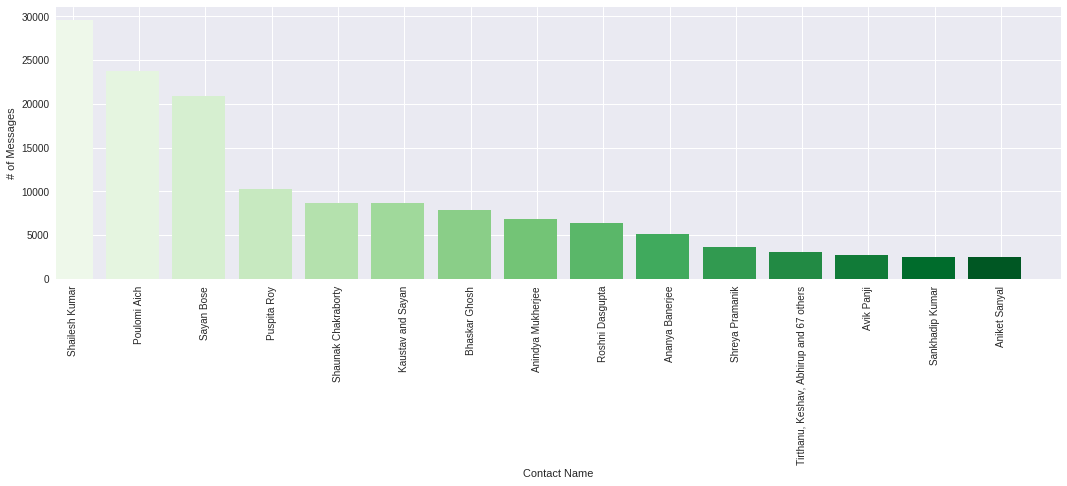

In [16]:
getMsgCountGraph(msgstatList, 15)

**Get Facebook message Vocabulary:**

In [0]:
def getMyVocabularyStat(dirname):
  num_files = getFileCount(dirname)
  messages = []
  for i in range(num_files):
    soup = BeautifulSoup(open(dirname+str(i)+'.html','r'), 'html.parser')
    for items in soup.find_all('span', 'user'):
      if items.text == 'Shamik Kundu':
        a = items.find_next('p')
        messages.append(a)
  vc = {}
  for message in messages:
    msg = message.text
    tokens = nltk.word_tokenize(msg)
    for token in tokens:
      tk_lower = token.lower()
      if tk_lower not in vc:
        vc[tk_lower] = 1
      else:
        vc[tk_lower] += 1
  vct = sorted(vc.items(), key=lambda x: x[1],reverse=True)
  v_clean = []
  for item in vct:
    word = item[0]
    count = item[1]
    try:
      word = str(word)
    except:
      pass
    v_clean.append((word,count))
  return v_clean
  
  

In [0]:
def WordCountGraphHelper(dirname,count):
  v_clean = getMyVocabularyStat(dirname)
  x = []
  y = []
  cnt = 0
  for item in v_clean:
    if cnt < count:
      x.append(item[0])
      y.append(item[1])
    else:
      break
    cnt = cnt + 1
  return x,y

In [0]:
def getWordCountGraph(dirname,wordscount=100):
  x,y = WordCountGraphHelper(dirname,wordscount)
  n = len(x)
  sns.set_context(rc={"figure.figsize": (18, 5)})
  nd = np.arange(n)
  width=0.2
  plt.xticks(nd+width/2., x,rotation = 90)
  plt.xlim(-0.15,n)
  plt.xlabel("Word Name")
  plt.ylabel("# of Occurances")
  fig = plt.bar(nd, y, color=sns.color_palette("Reds",n))
  plt.show()

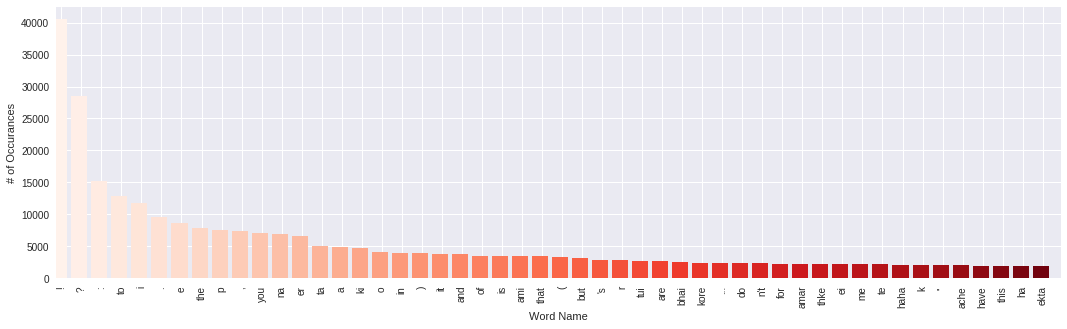

In [198]:
getWordCountGraph("drive/COLAB/Facebook/Message/",50)

**Get Wordcloud of top used words in messages:**

In [0]:
def wordCloudHelper(dirname):
  messages = []
  num_files = getFileCount(dirname)
  for i in range(num_files):
    soup = BeautifulSoup(open(dirname+str(i)+'.html','r'), 'html.parser')
    for items in soup.find_all('span', 'user'):
      if items.text == 'Shamik Kundu':
        a = items.find_next('p')
        messages.append(a.text)
  emoji_pattern = re.compile("["
          u"\U0001F600-\U0001F64F"  # emoticons
          u"\U0001F300-\U0001F5FF"  # symbols & pictographs
          u"\U0001F680-\U0001F6FF"  # transport & map symbols
          u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                             "]+", flags=re.UNICODE)
  msgs = []
  for texts in messages:
    text = emoji_pattern.sub(r'', texts)
    try:
      text = str(text)
      msgs.append(text)
    except:
      msgs.append(text)
  return msgs

In [0]:
def show_wordcloud(dirname,count = 50, title = None):
    msgs = wordCloudHelper(dirname)
    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=count,
        max_font_size=40, 
        scale=5,
        random_state=0 
    ).generate(str(msgs))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

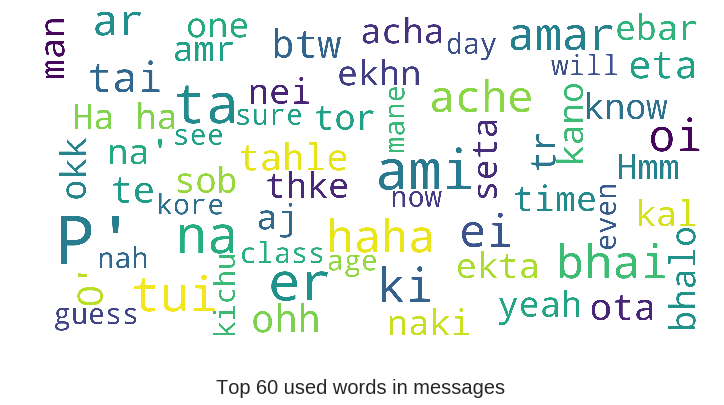

In [180]:
show_wordcloud('drive/COLAB/Facebook/Message/',60, 'Top 60 used words in messages')

**Day wise message count stat:**

In [0]:
def getDaywiseMessageCountStat(dirname):
  dayinfodict = {'Monday':0,'Tuesday':0,'Wednesday':0,'Thursday':0,'Friday':0,'Saturday':0,'Sunday':0}
  num_files = getFileCount(dirname)
  for i in range(num_files):
    soup = BeautifulSoup(open(dirname+str(i)+'.html','r'), 'html.parser')
    dayinfo = []
    for items in soup.find_all('span','meta'):
      timetext = items.text
      if timetext[6] == ',':
        dayinfo.append(str(timetext[:6]))
      elif timetext[7] == ",":
        dayinfo.append(str(timetext[:7]))
      elif timetext[8] == ",":
        dayinfo.append(str(timetext[:8]))
      elif timetext[9] == ",":
        dayinfo.append(str(timetext[:9]))
    c = Counter(dayinfo)
    count = c.items()
    for days in count:
      dayinfodict[days[0]] += days[1]
    if i%50 == 0:
      print "Progress: "+ str(i) + " contacts processed."
  return dayinfodict

In [0]:
def MessagebyWeekGraphHelper(dirname,printstat):
  daydict = getDaywiseMessageCountStat(dirname)
  daylist = sorted(daydict.items(), key=lambda x: x[1],reverse=True)
  days = []
  msgcount = []
  for items in daylist:
    days.append(items[0])
    msgcount.append(items[1])
  if printstat:
    print daylist
  return days, msgcount

In [0]:
def getMessagebyWeekGraph(dirname,printstat = False):
  x,y = MessagebyWeekGraphHelper(dirname,printstat)
  sns.set_context(rc={"figure.figsize": (14, 5)})
  nd = np.arange(7)
  width=0.2
  plt.xticks(nd+width/2., x,rotation = 90)
  plt.xlim(-0.15,7)
  plt.xlabel("Day of week")
  plt.ylabel("# of messages exchanged")
  fig = plt.bar(nd, y, color=sns.color_palette("Blues",7))
  plt.show()

Progress: 0 contacts processed.
Progress: 50 contacts processed.
Progress: 100 contacts processed.
Progress: 150 contacts processed.
Progress: 200 contacts processed.
Progress: 250 contacts processed.
Progress: 300 contacts processed.
Progress: 350 contacts processed.
[('Monday', 27428), ('Wednesday', 27347), ('Tuesday', 25251), ('Sunday', 25211), ('Saturday', 24810), ('Thursday', 24058), ('Friday', 23684)]


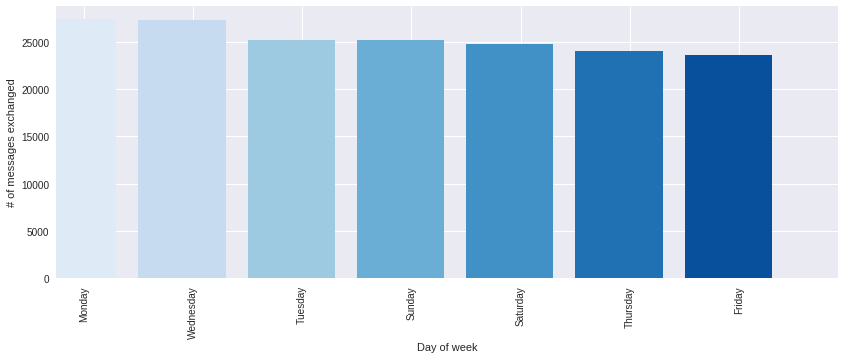

In [59]:
getMessagebyWeekGraph('drive/COLAB/Facebook/Message/', True)

**Year wise message count stat:**

In [0]:
def getYearwiseMessageCountStat(dirname):
  yearinfodict = {}
  num_files = getFileCount(dirname)
  for i in range(num_files):
    soup = BeautifulSoup(open(dirname+str(i)+'.html','r'), 'html.parser')
    dayinfo = []
    for items in soup.find_all('span','meta'):
      timetext = str(items.text[-25:-20]).strip()
      if timetext not in yearinfodict:
        yearinfodict[timetext] = 1
      else:
        yearinfodict[timetext] += 1 
    if i%50 == 0:
      print "Progress: "+ str(i) + " contacts processed."
  return yearinfodict

In [0]:
def MessagebyYearGraphHelper(dirname,printstat):
  yeardict = getYearwiseMessageCountStat(dirname)
  yearlist = sorted(yeardict.items(), key=lambda x: x[1],reverse=True)
  years = []
  msgcount = []
  for items in yearlist:
    years.append(items[0])
    msgcount.append(items[1])
  if printstat:
    print yearlist
  return years, msgcount

In [0]:
def getMessagebyYearGraph(dirname,printstat = False):
  x,y = MessagebyYearGraphHelper(dirname,printstat)
  n = len(x)
  sns.set_context(rc={"figure.figsize": (14, 5)})
  nd = np.arange(n)
  width=0.2
  plt.xticks(nd+width/2., x,rotation = 90)
  plt.xlim(-0.15,7)
  plt.xlabel("Years")
  plt.ylabel("# of messages exchanged")
  fig = plt.bar(nd, y, color=sns.color_palette("Oranges",n))
  plt.show()

Progress: 0 contacts processed.
Progress: 50 contacts processed.
Progress: 100 contacts processed.
Progress: 150 contacts processed.
Progress: 200 contacts processed.
Progress: 250 contacts processed.
Progress: 300 contacts processed.
Progress: 350 contacts processed.
[('2016', 63749), ('2013', 39603), ('2015', 30265), ('2014', 22733), ('2017', 16978), ('2018', 4461)]


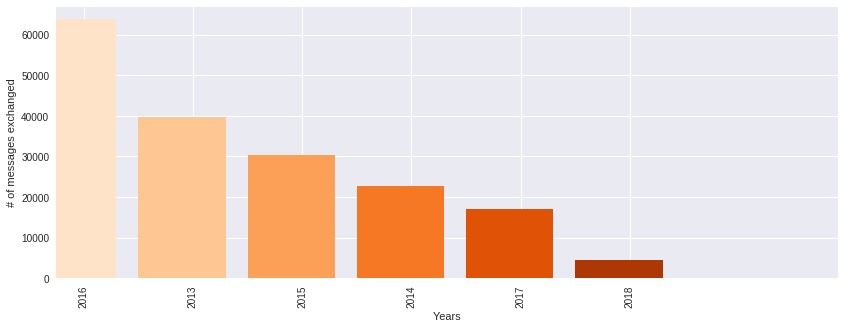

In [102]:
getMessagebyYearGraph('drive/COLAB/Facebook/Message/', True)

**Time of day wise message count stat:**

In [0]:
def getTimewiseMessageCountStat(dirname):
  num_files = getFileCount(dirname)
  timebucket = {i:0 for i in range(24)}
  datetimeinfo = []
  for i in range(num_files):
    soup = BeautifulSoup(open(dirname+str(i)+'.html','r'), 'html.parser')
    for item in soup.find_all('span','meta'):
      txt = str(item.text)
      txt = txt[-17:-10]
      datetimeinfo.append(txt.strip())
      
  for time in datetimeinfo:
    ampm = time[-2:]
    if ampm == 'am':
      if time[1] == ':':
        tm = int(time[0])
        if tm not in timebucket:
          timebucket[tm] = 1
        else:
          timebucket[tm] += 1
      else:
        tm = int(time[:2])
        if tm == 12:
          if 0 not in timebucket:
            timebucket[0] = 1
          else:
            timebucket[0] += 1
        else:
          if tm not in timebucket:
            timebucket[tm] = 1
          else:
            timebucket[tm] += 1
    else:
      if time[1] == ':':
        tm = int(time[0]) + 12
        if tm not in timebucket:
          timebucket[tm] = 1
        else:
          timebucket[tm] += 1
      else:
        tm = int(time[:2])
        if tm == 12:
          if tm not in timebucket:
            timebucket[tm] = 1
          else:
            timebucket[tm] += 1
        else:
          tm = tm + 12
          if tm not in timebucket:
            timebucket[tm] = 1
          else:
            timebucket[tm] += 1
  return timebucket

In [0]:
def MessagebyTimeGraphHelper(dirname,printstat):
  timebucket = getTimewiseMessageCountStat(dirname)
  x = []
  y = []
  for k,v in timebucket.iteritems():
    y.append(v)
    if k == 0:
      x.append("12am - 1am")
    elif k> 0 and k<11:
      x.append(str(k)+"am - "+str(k+1)+"am")
    elif k == 11:
      x.append("11am - 12pm")
    elif k == 12:
      x.append("12pm - 1pm")
    elif k == 23:
      x.append("11pm - 12am")
    else:
      x.append(str(k-12)+"pm - "+str(k-11)+"pm")
  if printstat:
    for i in range(len(x)):
      print  x[i]+ "   ->   " + str(y[i])
  return x,y

In [0]:
def getMessagebyTimeGraph(dirname,printstat = False):
  x,y = MessagebyTimeGraphHelper(dirname,printstat)
  n = len(x)
  sns.set_context(rc={"figure.figsize": (18, 5)})
  nd = np.arange(n)
  width=0.2
  plt.xticks(nd+width/2., x,rotation = 90)
  plt.xlim(-0.15,n)
  plt.xlabel("Time of the day")
  plt.ylabel("# of messages exchanged")
  fig = plt.bar(nd, y, color=sns.color_palette("Greens",n))
  plt.show()

12am - 1am   ->   16281
1am - 2am   ->   3725
2am - 3am   ->   647
3am - 4am   ->   178
4am - 5am   ->   42
5am - 6am   ->   227
6am - 7am   ->   868
7am - 8am   ->   1480
8am - 9am   ->   2415
9am - 10am   ->   3616
10am - 11am   ->   5332
11am - 12pm   ->   5543
12pm - 1pm   ->   4094
1pm - 2pm   ->   3677
2pm - 3pm   ->   4365
3pm - 4pm   ->   5688
4pm - 5pm   ->   5431
5pm - 6pm   ->   7049
6pm - 7pm   ->   9323
7pm - 8pm   ->   18114
8pm - 9pm   ->   21487
9pm - 10pm   ->   15480
10pm - 11pm   ->   17765
11pm - 12am   ->   24962


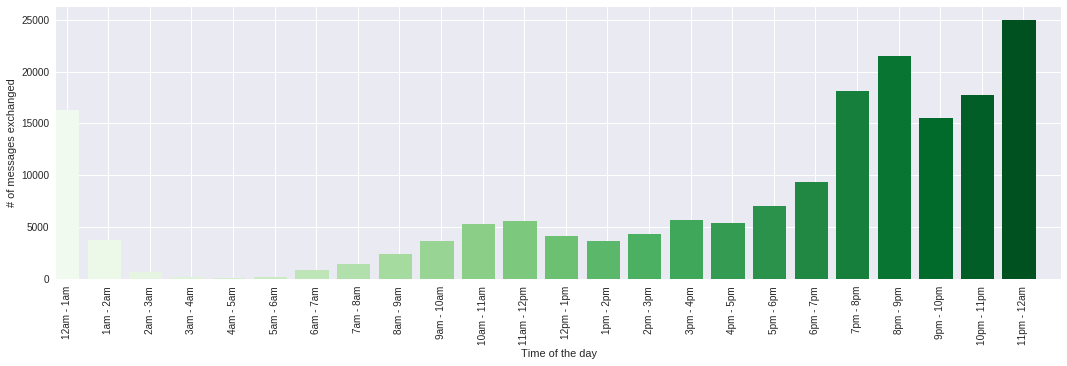

In [187]:
getMessagebyTimeGraph('drive/COLAB/Facebook/Message/',True)